## Import Packages

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Load data

In [55]:
train = pd.read_csv("raw/train.csv", index_col=0)

KeyboardInterrupt: 

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


## Basic statistics

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [ ]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [ ]:
train.nunique()

age            78
job            12
marital         3
education       4
default         2
balance      8217
housing         2
loan            2
contact         3
day            31
month          12
duration     1760
campaign       52
pdays         596
previous       50
poutcome        4
y               2
dtype: int64

In [ ]:
train["y"].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

Dataset is unbalanced

## Plots by category

### Density

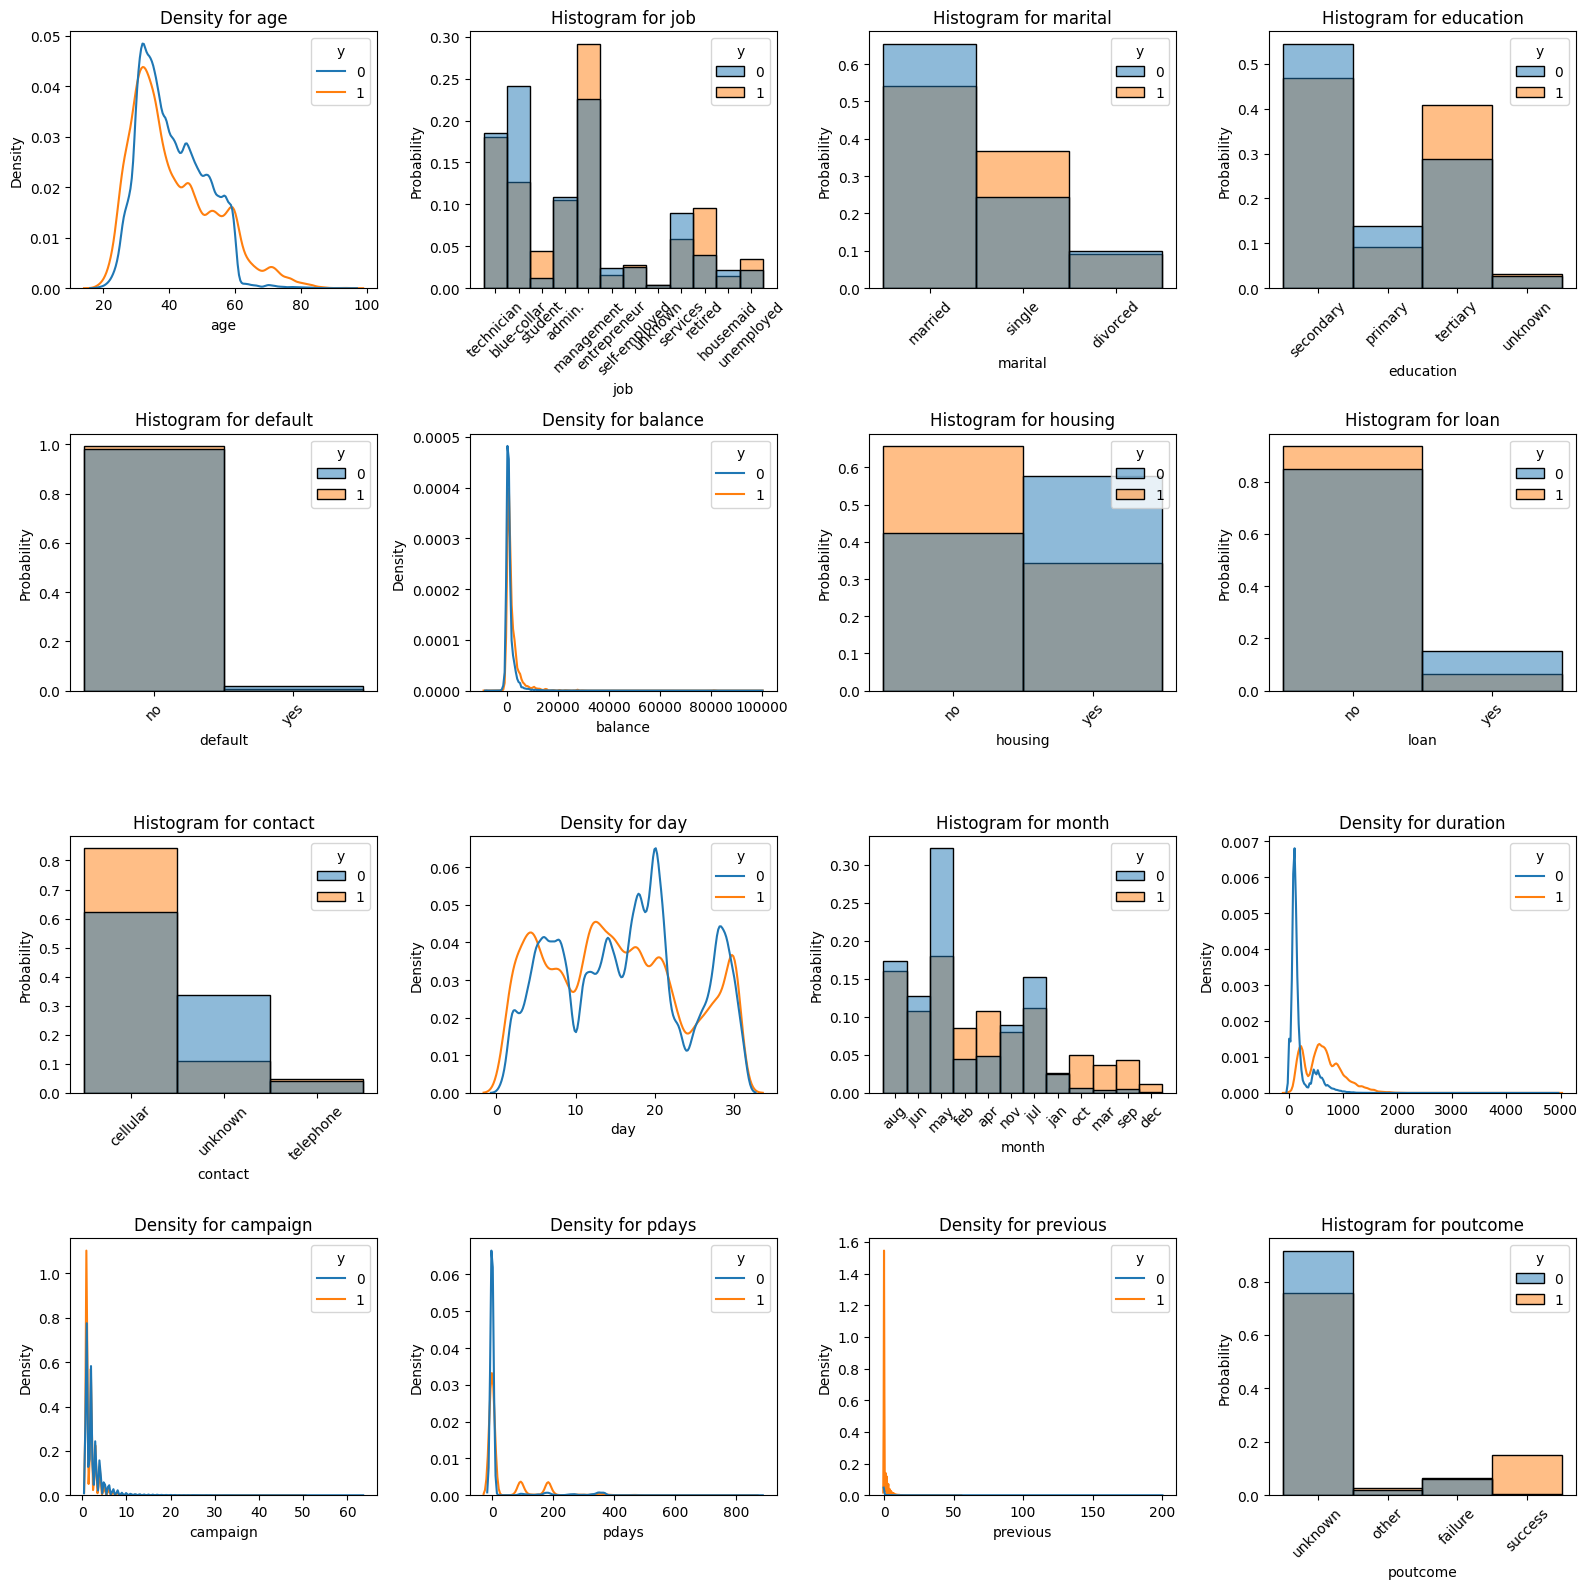

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axs = axs.flatten()
y = train["y"]
for i, col in enumerate(list(train.columns)[:-1]):
    data = train[col]
    if data.dtype=="object":
        sns.histplot(
            x = data,
            hue = y,
            stat = "probability",
            ax = axs[i],
            common_norm=False
        )
        axs[i].set_title(f"Histogram for {col}")
        axs[i].tick_params(axis="x", rotation=45)
    else:
        sns.kdeplot(
            x = data,
            hue = y,
            ax = axs[i],
            common_norm=False
        )
        axs[i].set_title(f"Density for {col}")
plt.tight_layout()
plt.show()

In [ ]:
## One way
for col in train.columns.drop("y"):
    temp_df = train[[col, "y"]].copy()
    if pd.api.types.is_numeric_dtype(train[col]):
        temp_df[col] = pd.qcut(temp_df[col], q=10, duplicates="drop")
    temp_df = temp_df.pivot_table(index=col, columns="y", aggfunc="size", fill_value=0, observed=False)
    temp_df["chance"] = temp_df.loc[:, 1] / temp_df.loc[:, 0]
    print(temp_df)

y                   0      1    chance
age                                   
(17.999, 30.0]  84708  19067  0.225091
(30.0, 32.0]    63451   8085  0.127421
(32.0, 34.0]    60922   7720  0.126719
(34.0, 36.0]    56953   7126  0.125121
(36.0, 39.0]    69982   7815  0.111672
(39.0, 42.0]    58649   5845  0.099661
(42.0, 46.0]    72871   7452  0.102263
(46.0, 51.0]    78075   7201  0.092232
(51.0, 56.0]    64582   6694  0.103651
(56.0, 95.0]    49319  13483  0.273383
y                   0      1    chance
job                                   
admin.          72002   9490  0.131802
blue-collar    159000  11498  0.072314
entrepreneur    16276   1442  0.088597
housemaid       14565   1347  0.092482
management     149141  26400  0.177014
retired         26521   8664  0.326685
self-employed   16558   2462  0.148689
services        58898   5311  0.090173
student          7757   4010  0.516952
technician     121766  16341  0.134200
unemployed      14463   3171  0.219249
unknown          2565    

In [56]:
pd.set_option('display.max_columns', None)  # Show all columns without truncation
pd.set_option('display.expand_frame_repr', False)  # Disable line wrapping of wide frames

In [158]:
def make_plot(df, col1, col2, ax=None, q: int = 10, global_min: float | None = None, global_max: float | None = None):
    temp_df = df[[col1, col2, "y"]].copy()
    if pd.api.types.is_numeric_dtype(train[col1]):
        temp_df[col1] = pd.qcut(temp_df[col1], q=q, duplicates="drop")
    if pd.api.types.is_numeric_dtype(train[col2]):
        temp_df[col2] = pd.qcut(temp_df[col2], q=q, duplicates="drop")
        
    temp_df_col1 = temp_df.pivot_table(index=col1, columns="y", aggfunc="size", fill_value=0, observed=False)
    temp_df_col1["prob"] = temp_df_col1.loc[:, 1] / (temp_df_col1.loc[:, 0] + temp_df_col1.loc[:, 1])
    temp_df_col2 = temp_df.pivot_table(index=col2, columns="y", aggfunc="size", fill_value=0, observed=False)
    temp_df_col2["prob"] = temp_df_col2.loc[:, 1] / (temp_df_col2.loc[:, 0] + temp_df_col2.loc[:, 1])
    
    combined_prob = temp_df.pivot_table(index=col1, columns=[col2, "y"], aggfunc="size", fill_value=0, observed=False)
    combined_prob = combined_prob.xs(1, 1, 1) / (combined_prob.xs(1, 1, 1) + combined_prob.xs(0, 1, 1))
    
    mult_prob = pd.DataFrame(
        temp_df_col1[["prob"]].values * temp_df_col2[["prob"]].values.T / (temp_df["y"].sum() / len(temp_df)),
        index=temp_df_col1.index,
        columns=temp_df_col2.index
    )
    
    sns.heatmap(
        ((mult_prob - combined_prob) / (mult_prob * combined_prob + 1e-8)),
        ax=ax,
        vmin=global_min,
        vmax=global_max,
        cmap="coolwarm"
    )
    ax.tick_params(axis='x', labelsize=4)
    ax.tick_params(axis='y', labelsize=4)

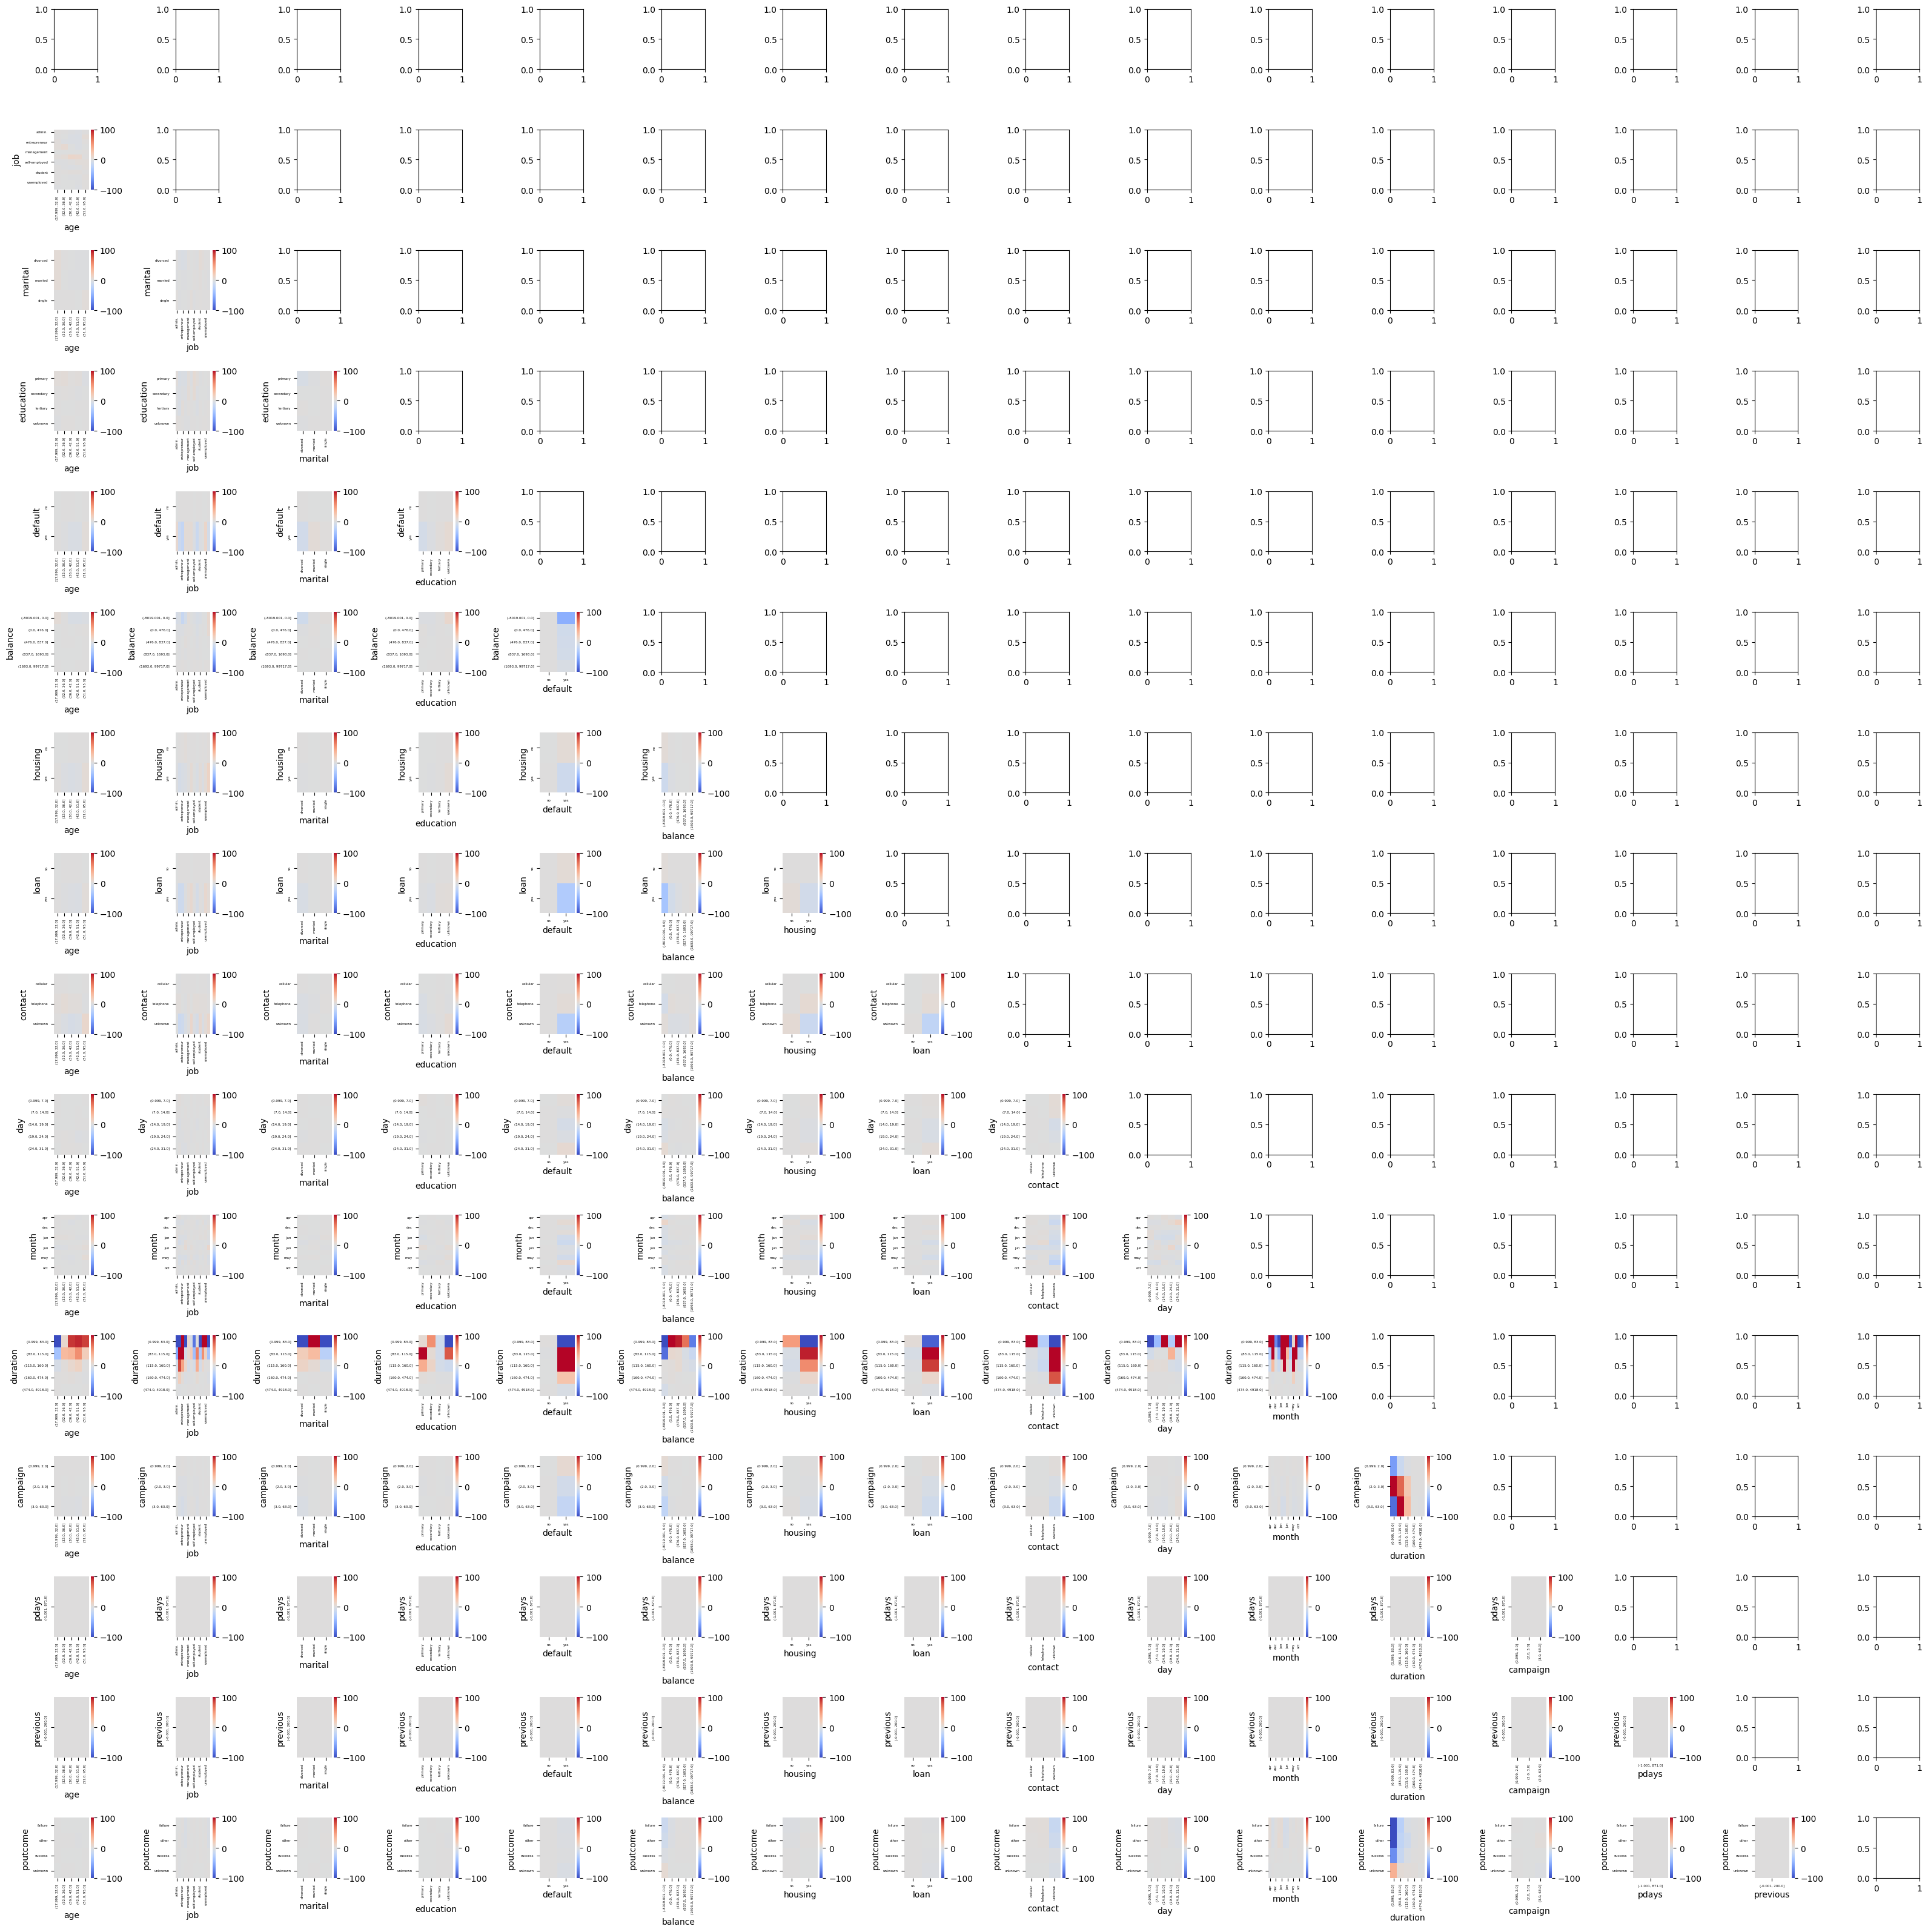

In [160]:
columns = train.columns.drop("y")
# columns = ["duration", "poutcome", "balance", "housing", "loan"]
fig, axs = plt.subplots(len(columns), len(columns), figsize=(len(columns) * 2, len(columns) * 2))
## Two way
for i, col in enumerate(columns):
    for k, col2 in enumerate(columns):
        if i > k:
            make_plot(train, col, col2, ax=axs[i, k], q=5, global_min=-100, global_max=100)
plt.tight_layout()
plt.show()
    

In [ ]:
from scipy.stats import chisquare

In [ ]:
for col in ["poutcome", "job", "marital", "education", "default", "housing", "loan", "contact", "month"]:
  for value in temp_df[col].unique():
    temp_proportions = (
        temp_df[temp_df[col] == value].groupby("y")["duration_bins"]
          .value_counts(normalize=True)
          .rename("proportion")
          .reset_index()
    )

    temp_proportions["bin_code"] = temp_proportions["duration_bins"].cat.codes

    # Sort by y and then bin_code
    temp_proportions = temp_proportions.sort_values(
        by=["y", "bin_code"],
        ignore_index=True
    )

    chi2_stat, p_val = chisquare(f_obs=proportions_duration.loc[:(bins-1), "proportion"], f_exp=temp_proportions.loc[:(bins-1), "proportion"])
    if p_val < 0.1:
      print(f"Chi2 stat: {chi2_stat}, p-value: {p_val} for {col}: {value}")
    chi2_stat, p_val = chisquare(f_obs=proportions_duration.loc[bins:, "proportion"], f_exp=temp_proportions.loc[bins:, "proportion"])
    if p_val < 0.1:
      print(f"Chi2 stat: {chi2_stat}, p-value: {p_val} for {col}: {value}")

In [ ]:
for col in ["poutcome", "job", "marital", "education", "default", "housing", "loan", "contact", "month"]:
  for value in temp_df[col].unique():
    temp_proportions = (
        temp_df[temp_df[col] == value].groupby("y")["balance_bins"]
          .value_counts(normalize=True)
          .rename("proportion")
          .reset_index()
    )

    temp_proportions["bin_code"] = temp_proportions["balance_bins"].cat.codes

    # Sort by y and then bin_code
    temp_proportions = temp_proportions.sort_values(
        by=["y", "bin_code"],
        ignore_index=True
    )

    chi2_stat, p_val = chisquare(f_obs=proportions.loc[:(bins-1), "proportion"], f_exp=temp_proportions.loc[:(bins-1), "proportion"])
    if p_val < 0.1:
      print(f"Chi2 stat: {chi2_stat}, p-value: {p_val} for {col}: {value}")
      
    chi2_stat, p_val = chisquare(f_obs=proportions.loc[bins:, "proportion"], f_exp=temp_proportions.loc[bins:, "proportion"])
    if p_val < 0.1:
      print(f"Chi2 stat: {chi2_stat}, p-value: {p_val} for {col}: {value}")

Chi2 stat: 11.746589989750083, p-value: 0.019338615424154403 for default: yes
Chi2 stat: 11.924986633921314, p-value: 0.017917889145923672 for default: yes


In [ ]:
for col in ["poutcome", "job", "marital", "education", "default", "housing", "loan", "contact", "month"]:
  for value in temp_df[col].unique():
      for col2 in ["poutcome", "job", "marital", "education", "default", "housing", "loan", "contact", "month"]:
        for value2 in temp_df[col].unique():
            temp_proportions = (
                temp_df[
                    ( temp_df[col] == value )
                    & ( temp_df[col2] == value2 )
                ].groupby("y")["balance_bins"]
                .value_counts(normalize=True)
                .rename("proportion")
                .reset_index()
            )

            temp_proportions["bin_code"] = temp_proportions["balance_bins"].cat.codes

            # Sort by y and then bin_code
            temp_proportions = temp_proportions.sort_values(
                by=["y", "bin_code"],
                ignore_index=True
            )
            if len(temp_proportions) > 0 and col != col2:
                chi2_stat, p_val = chisquare(f_obs=proportions.loc[:(bins-1), "proportion"], f_exp=temp_proportions.loc[:(bins-1), "proportion"])
                if p_val < 0.1:
                    print(f"Chi2 stat: {chi2_stat}, p-value: {p_val} for {col}: {value} and {col2}: {value2}")
                
                chi2_stat, p_val = chisquare(f_obs=proportions.loc[bins:, "proportion"], f_exp=temp_proportions.loc[bins:, "proportion"])
                if p_val < 0.1:
                    print(f"Chi2 stat: {chi2_stat}, p-value: {p_val} for {col}: {value} and {col2}: {value2}")

C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


Chi2 stat: inf, p-value: 0.0 for poutcome: other and job: unknown


C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


Chi2 stat: inf, p-value: 0.0 for poutcome: failure and job: unknown


C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


Chi2 stat: inf, p-value: 0.0 for job: unknown and contact: unknown


C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


Chi2 stat: inf, p-value: 0.0 for job: housemaid and education: unknown
Chi2 stat: 8.916320814961928, p-value: 0.06322543563593248 for default: yes and housing: no
Chi2 stat: 9.130502513491413, p-value: 0.05791903896037709 for default: yes and housing: no
Chi2 stat: 15.023852395428591, p-value: 0.004652000506099549 for default: yes and housing: yes
Chi2 stat: 16.566923024030086, p-value: 0.0023455695525859514 for default: yes and housing: yes
Chi2 stat: 13.60834020358816, p-value: 0.00865591927756515 for default: yes and loan: no
Chi2 stat: 9.628438235144749, p-value: 0.047173988555378424 for default: yes and loan: yes
Chi2 stat: inf, p-value: 0.0 for default: yes and loan: yes


C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


Chi2 stat: 8.916320814961928, p-value: 0.06322543563593248 for housing: no and default: yes
Chi2 stat: 9.130502513491413, p-value: 0.05791903896037709 for housing: no and default: yes
Chi2 stat: 15.023852395428591, p-value: 0.004652000506099549 for housing: yes and default: yes
Chi2 stat: 16.566923024030086, p-value: 0.0023455695525859514 for housing: yes and default: yes
Chi2 stat: 13.60834020358816, p-value: 0.00865591927756515 for loan: no and default: yes
Chi2 stat: 9.628438235144749, p-value: 0.047173988555378424 for loan: yes and default: yes
Chi2 stat: inf, p-value: 0.0 for loan: yes and default: yes


C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


Chi2 stat: inf, p-value: 0.0 for contact: unknown and job: unknown


Balance, Duration, Campaign and Previous need transformation to normal distribution

Interesting variables:
- age
- job (at least some professions like student, management, retired, blue-collar, services)
- marital
- education
- housing
- loan
- contact
- day
- month
- duration
- campaign
- previous (especially for small values)
- poutcome (unknown, success!!!!)

### Boxplots for numeric

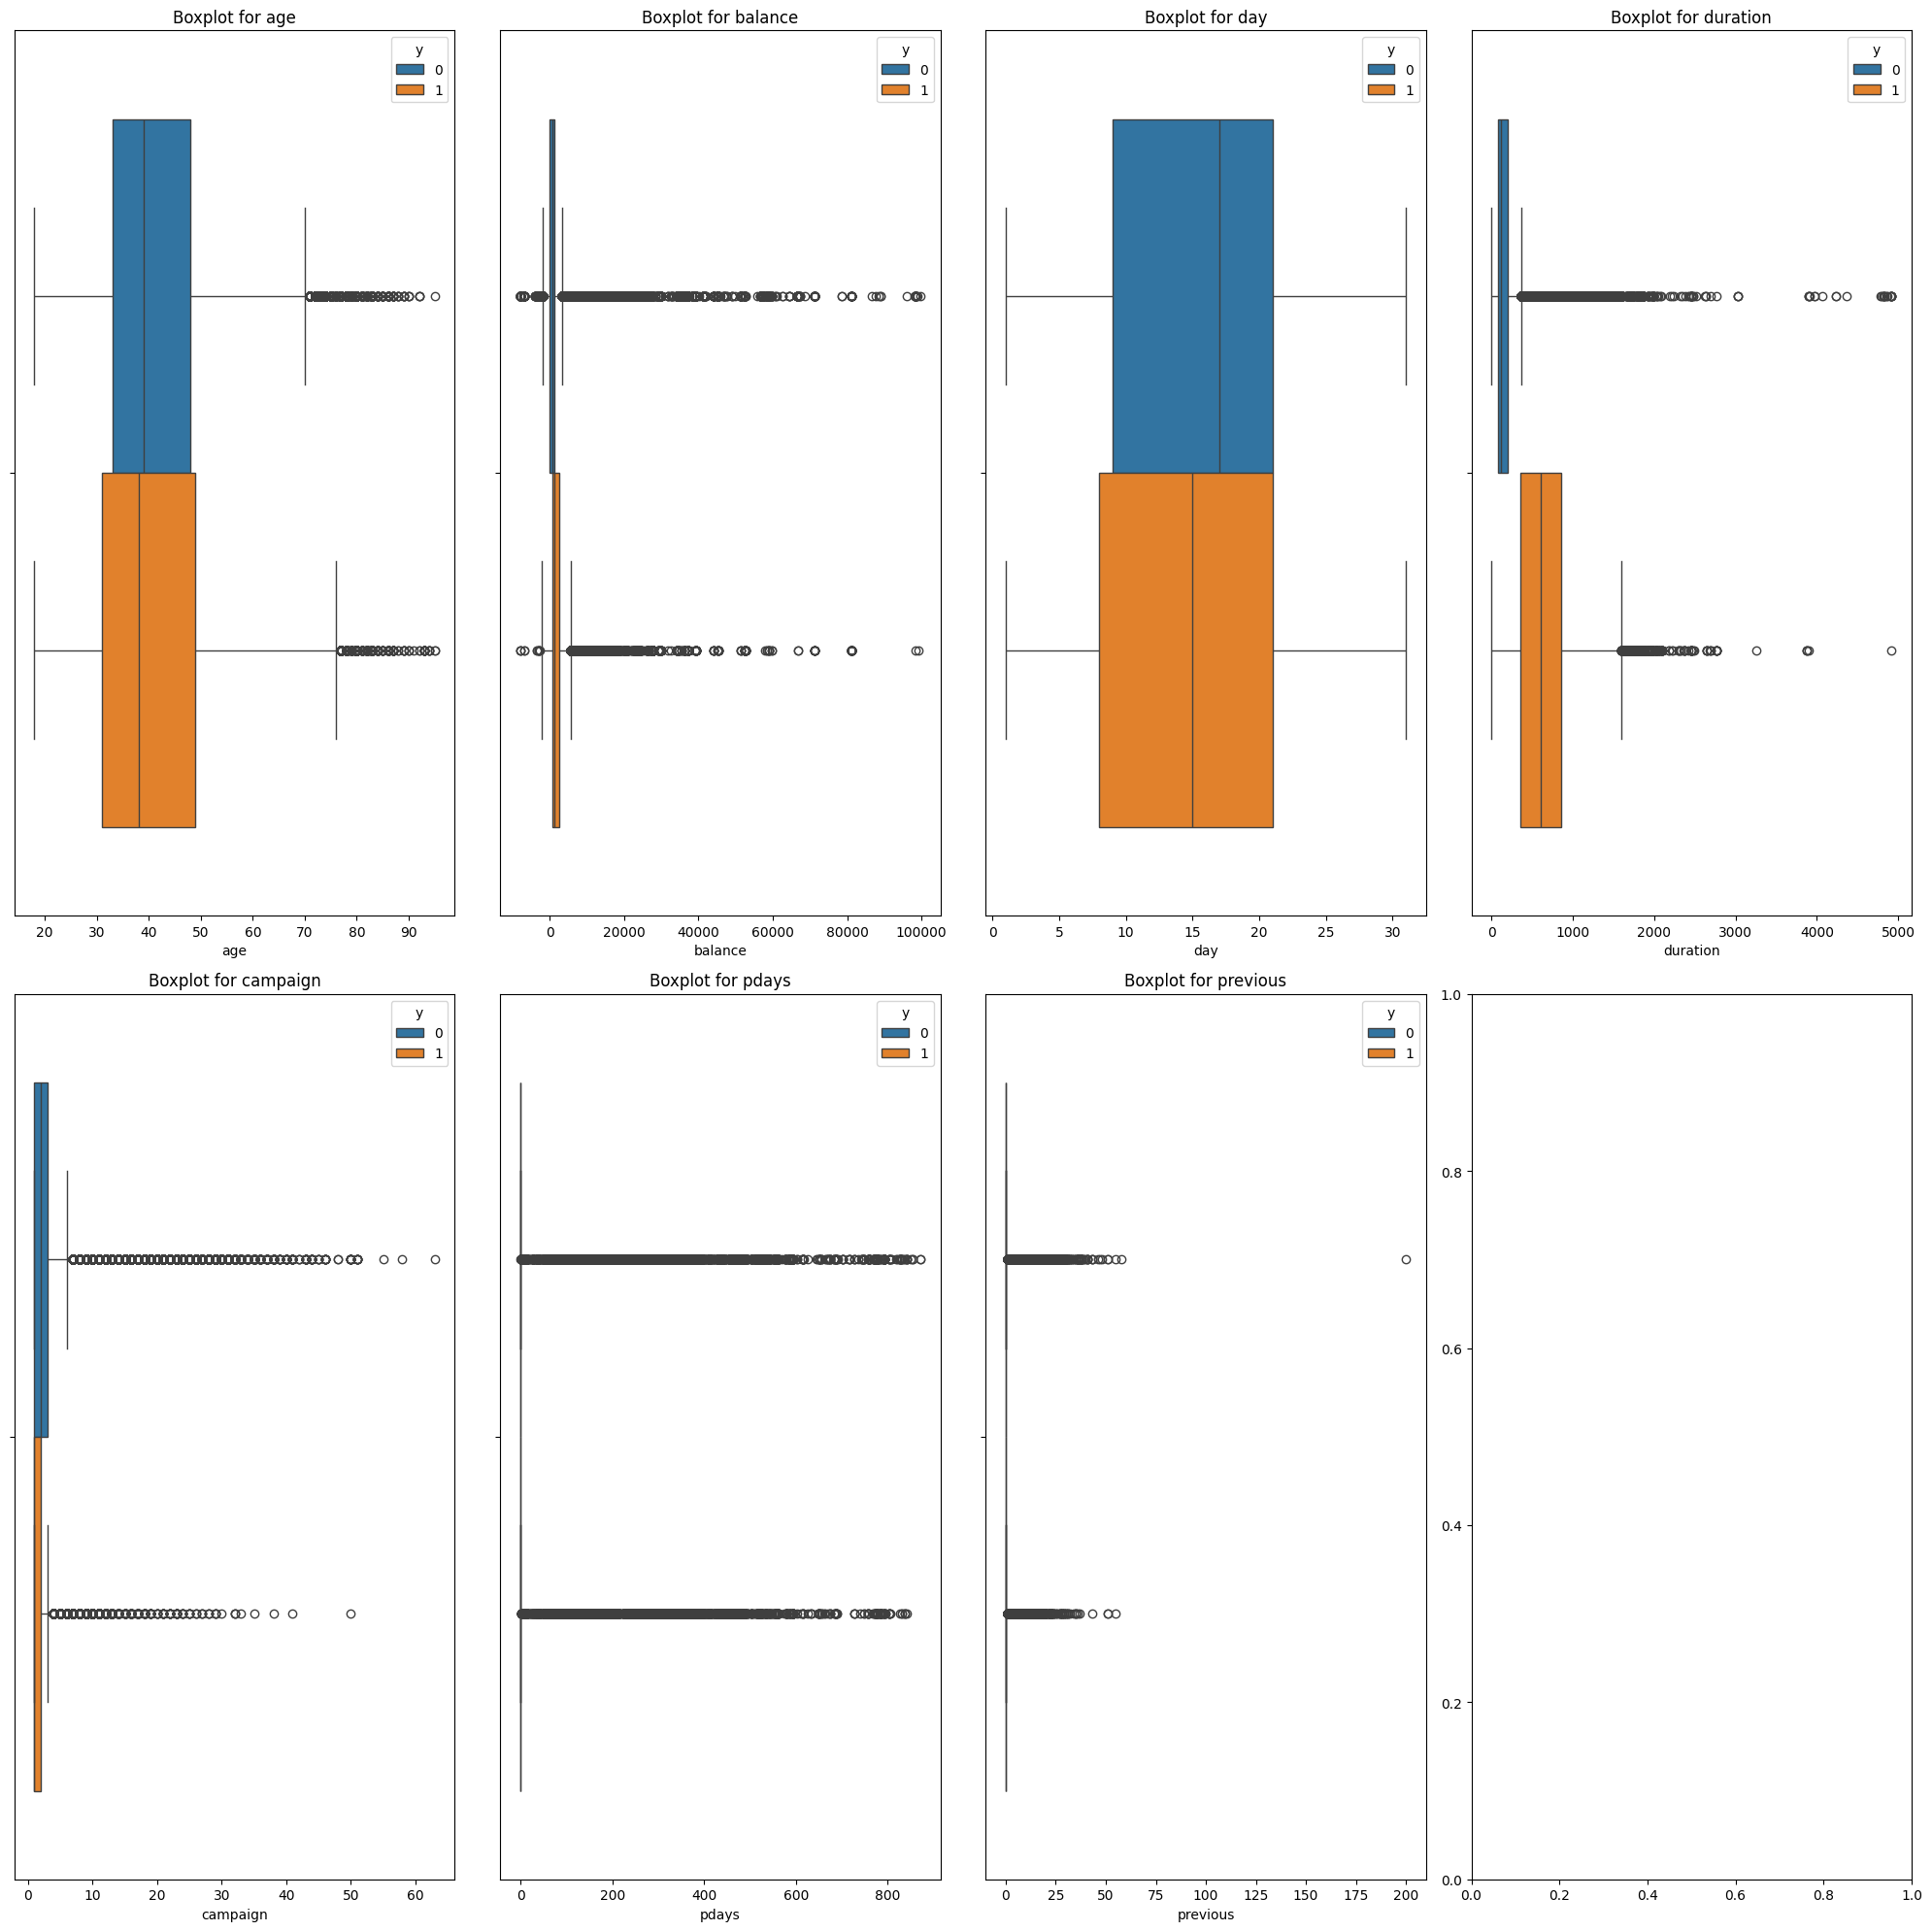

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20,20))
axs = axs.flatten()
i = 0
for col_name, value in train.select_dtypes(exclude="object").drop(labels="y", axis=1).items():
    sns.boxplot(
        x = value,
        hue = y,
        ax = axs[i]
    )
    axs[i].set_title(f"Boxplot for {col_name}")
    i += 1
plt.tight_layout()
plt.show()

The most promising feature from boxplot is duration

### Analysis of pdays column

In [ ]:
train["pdays"].describe()

count    750000.000000
mean         22.412733
std          77.319998
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max         871.000000
Name: pdays, dtype: float64

In [ ]:
train["pdays_bins"] = pd.cut(train["pdays"], bins=[-np.inf, -1, 100, np.inf])

C:\Users\bogus\AppData\Local\Temp\ipykernel_7176\1444306242.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted(ax.get_xticklabels(), key=lambda x: float(x.get_text().split(',')[0][1:])))


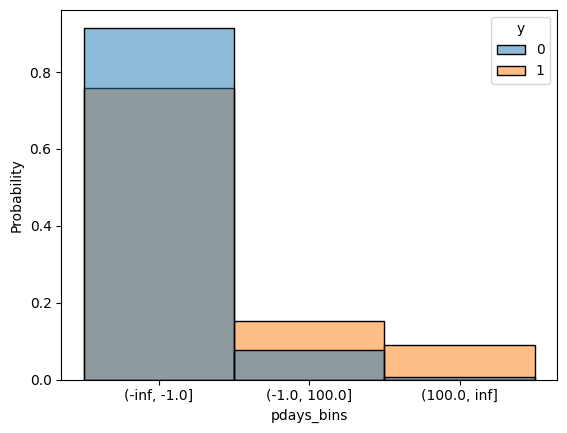

In [ ]:
ax = sns.histplot(
    x=train["pdays_bins"].astype(str), 
    hue=y,
    stat = "probability",
    # bins=10,
    common_norm=False
)
ax.set_xticklabels(sorted(ax.get_xticklabels(), key=lambda x: float(x.get_text().split(',')[0][1:])))
plt.show()

### Pairplots

In [ ]:
cols = train.columns.drop(labels=["pdays", "y"])
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'pdays_bins'],
      dtype='object')

In [ ]:
def prepare_heatmap(x1, x2, y):
    data = pd.concat([x1, x2, y], axis=1)
    to_heatmap = (
        data
        .groupby([x1.name, x2.name], observed=True)
        .agg("mean")
        .reset_index()
        .pivot(index=x1.name, columns=x2.name, values=y.name)
    )
    if isinstance(x1, pd.CategoricalDtype):
        to_heatmap = to_heatmap.reindex(
            index = x1.cat.categories
        )
    if isinstance(x2, pd.CategoricalDtype):
        to_heatmap = to_heatmap.reindex(
            columns = x2.cat.categories
        )
    return to_heatmap

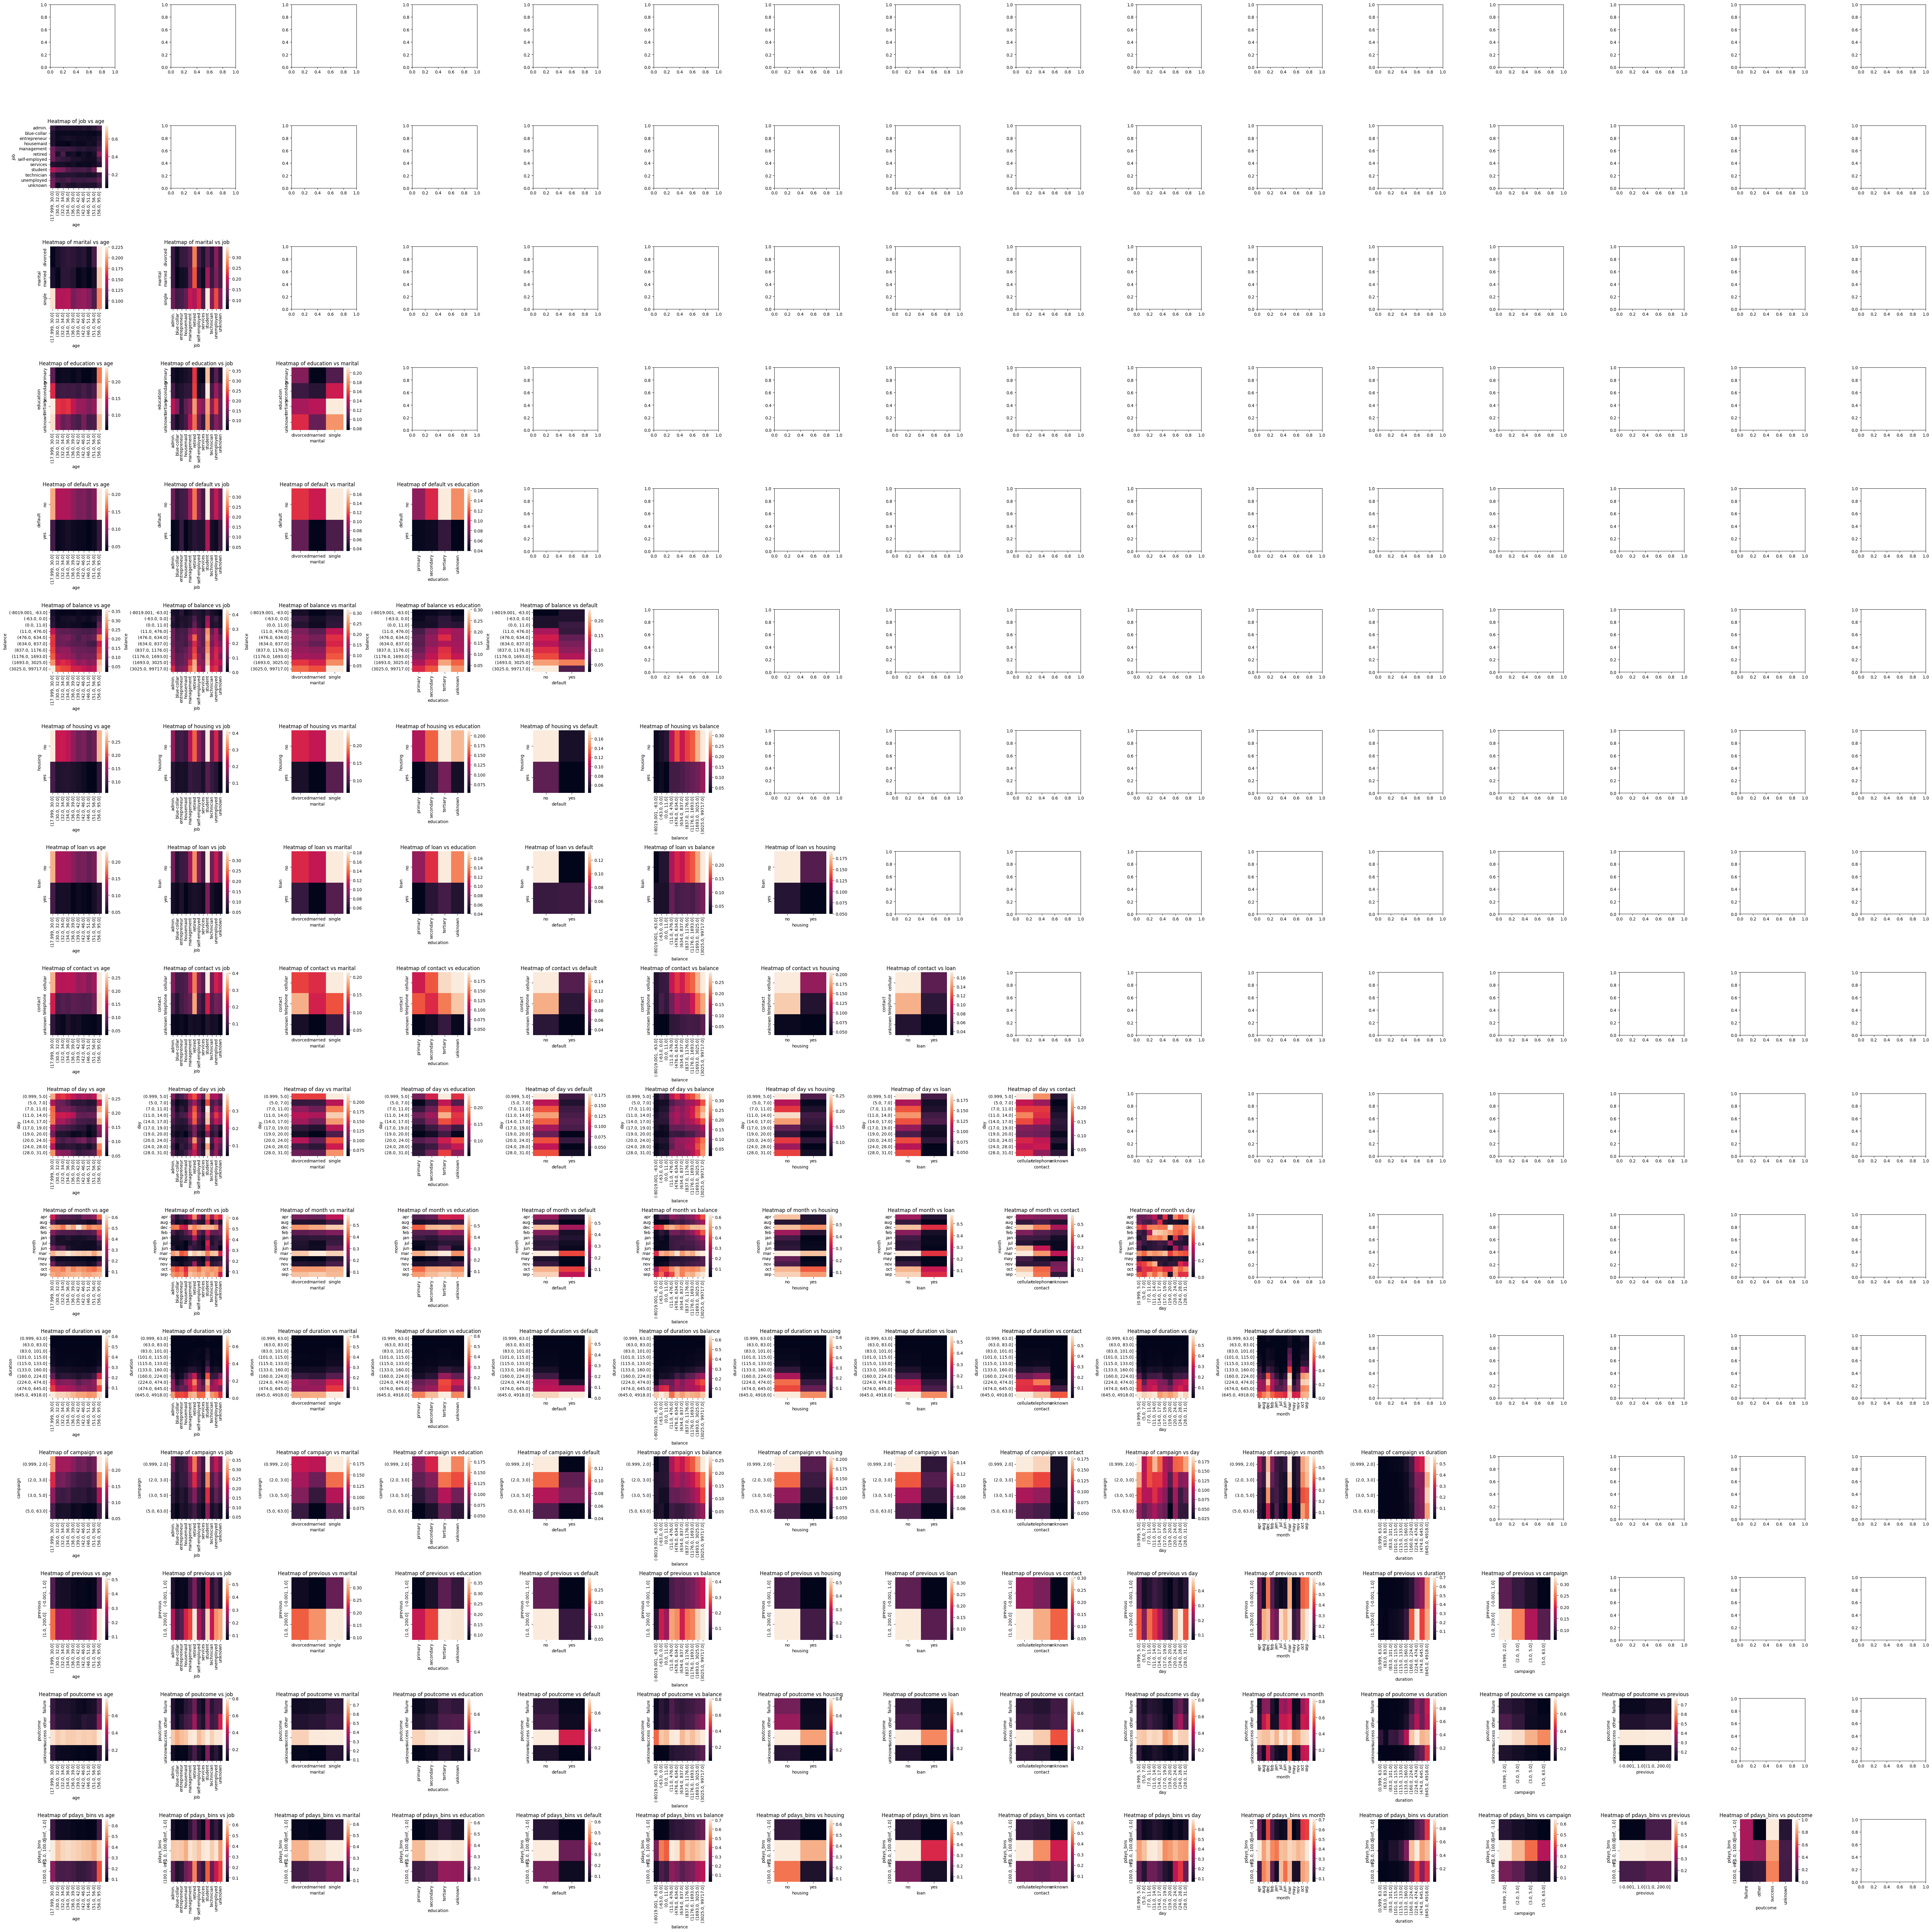

In [ ]:
fig, axs = plt.subplots(16, 16, figsize=(64, 64))
for row, x_col in enumerate(cols):
    x_data = train[x_col]
    if pd.api.types.is_numeric_dtype(x_data) & (x_col not in ["month"]):
        x_data = pd.qcut(x_data, q=10, duplicates="drop")
    for col, y_col in enumerate(cols):
        if row > col:
            y_data = train[y_col]
            if pd.api.types.is_numeric_dtype(y_data) & (y_col not in ["month"]):
                y_data = pd.qcut(y_data, q=10, duplicates="drop")
            
            to_heatmap = prepare_heatmap(x_data, y_data, y)
            sns.heatmap(
                to_heatmap,
                ax = axs[row, col]
            )
            axs[row, col].set_title(f"Heatmap of {x_col} vs {y_col}")
            
plt.tight_layout()
plt.show()

## Correlations

In [ ]:
# spearman
(
    train
    .select_dtypes(exclude="object")
    .drop("pdays_bins", axis=1)
    .corr(method="spearman")
)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.062646,-0.016741,-0.048019,0.030686,-0.015867,-0.013049,-0.023160
balance,0.062646,1.000000,-0.027453,0.168684,-0.050386,0.053741,0.061328,0.197585
day,-0.016741,-0.027453,1.000000,-0.107256,0.169197,-0.083960,-0.081776,-0.050879
duration,-0.048019,0.168684,-0.107256,1.000000,-0.152000,0.076728,0.079240,0.439505
campaign,0.030686,-0.050386,0.169197,-0.152000,1.000000,-0.087104,-0.085785,-0.092629
pdays,-0.015867,0.053741,-0.083960,0.076728,-0.087104,1.000000,0.995444,0.160032
previous,-0.013049,0.061328,-0.081776,0.079240,-0.085785,0.995444,1.000000,0.170808
y,-0.023160,0.197585,-0.050879,0.439505,-0.092629,0.160032,0.170808,1.000000


In [ ]:
# pearson
(
    train
    .select_dtypes(exclude="object")
    .drop("pdays_bins", axis=1)
    .corr(method="pearson")
)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.062838,-0.015179,-0.004388,0.002052,-0.021635,0.004541,0.009523
balance,0.062838,1.000000,-0.008269,0.109629,-0.027744,0.010040,0.033897,0.122513
day,-0.015179,-0.008269,1.000000,-0.056755,0.178806,-0.086197,-0.051082,-0.049625
duration,-0.004388,0.109629,-0.056755,1.000000,-0.083016,0.047555,0.040105,0.519283
campaign,0.002052,-0.027744,0.178806,-0.083016,1.000000,-0.061465,-0.026707,-0.075829
pdays,-0.021635,0.010040,-0.086197,0.047555,-0.061465,1.000000,0.561839,0.089277
previous,0.004541,0.033897,-0.051082,0.040105,-0.026707,0.561839,1.000000,0.119552
y,0.009523,0.122513,-0.049625,0.519283,-0.075829,0.089277,0.119552,1.000000


<Axes: >

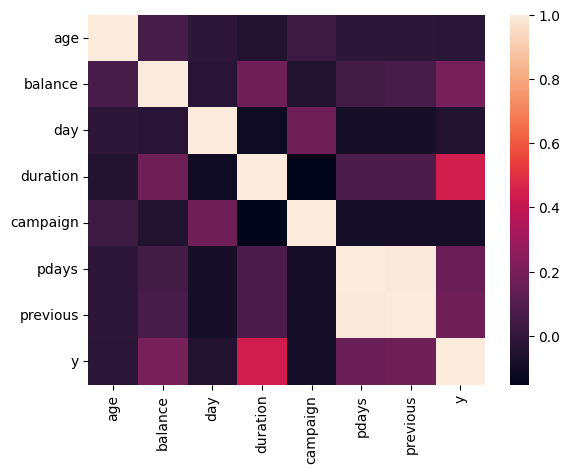

In [ ]:
sns.heatmap(
    train
    .select_dtypes(exclude="object")
    .drop("pdays_bins", axis=1)
    .corr(method="spearman")
)

Duration is a really good candidate. But it is not monotonic realtion. It looks like reverse U-shape. <br>
And looks good with age and balance <br>
Need to choose either pdays or previous, due to high correlation

## hist of success probability within bin

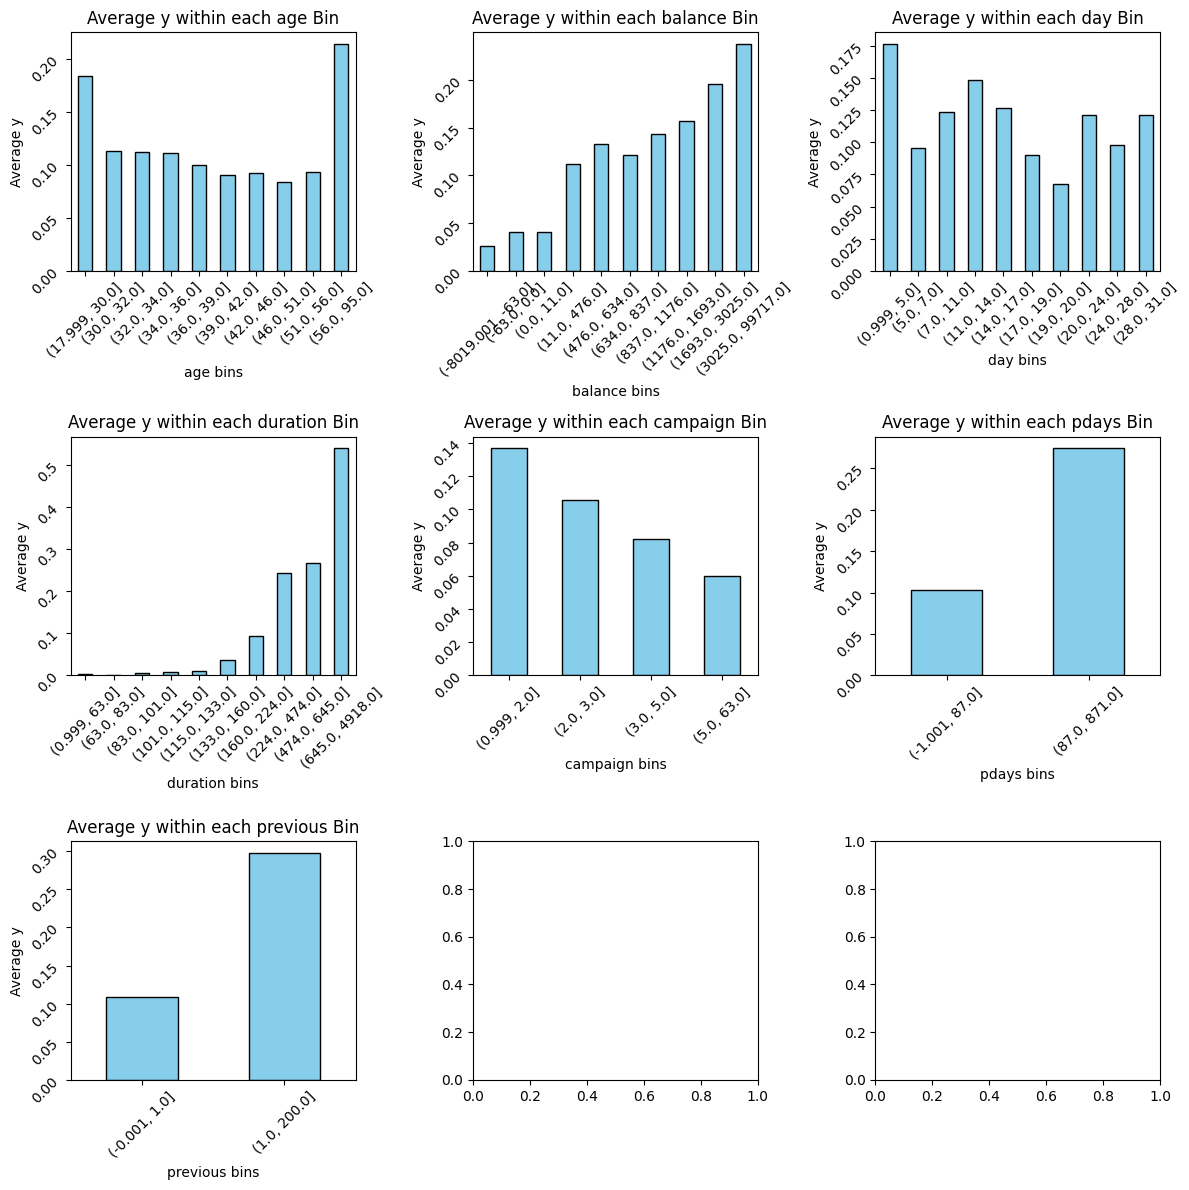

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
axs = axs.flatten()

for i, var in enumerate(train.select_dtypes(exclude="object").columns.drop(["y", "pdays_bins"])):
    train_to_plot_temp = train[[var, "y"]].copy()
    train_to_plot_temp[f"{var}_bins"] = pd.qcut(train_to_plot_temp[var], q=10, duplicates="drop")
    # Group by duration_bins and calculate mean of y
    bin_means = train_to_plot_temp.groupby(f"{var}_bins", observed=False)["y"].mean()

    # Plot
    bin_means.plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_ylabel("Average y")
    axs[i].set_xlabel(f"{var} bins")
    axs[i].set_title(f"Average y within each {var} Bin")
    axs[i].tick_params(rotation=45)
plt.tight_layout()
plt.show()

## outliers

## regression tree